<a href="https://colab.research.google.com/github/dbahiense/MachineLearning/blob/main/03Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **III. PROBLEMA DE REGRESSÃO**

# 1. Preparativos
---

## 1.1 Importar Bibliotecas e Módulos

In [34]:
#importar bibliotecas e módulos necessários
import numpy
from numpy import arange
from numpy import set_printoptions

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import joblib

## 1.2 Parâmetros

In [35]:
# Opções e métricas para treino e teste
test_size = 0.20
seed = 7
num_folds = 10
scoring = 'neg_mean_squared_error'

---
**Notas:**  
- `test_size`é um float...

- `seed` é um inteiro utilizado em `random_state` que, por sua vez, indica o grau de *embaralhamento* (shuffling) aplicado aos dados antes do fatiamento.  
https://scikit-learn.org/stable/glossary.html#term-random_state  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 2. Dados
---

## 2.1 Obter Dados

In [36]:
#endereço dos dados originais
#pode ser modificado para endereço local na própria máquina
url = "https://gist.githubusercontent.com/dbahiense/10f30ddee5ea0e44b63bb08db1010c9d/raw/368fb94696d70253dc9cd4683bec6fad4fcf22ee/housing.csv"

#nome dos atributos
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#lê o arquivo
#delimitador é espaço em branco (delim_whitespace = True)
data = read_csv(url, delim_whitespace=True, names=columns)

## 2.2 Entender Dados

### 2.2.1 Descrever Dados

In [37]:
#mostra as dimensões do dataset
shape = data.shape #(linhas, colunas)
shape

(506, 14)

In [38]:
#mostra as primeiras n instâncias dos dados
peek = data.head(10) #head(n) para mostrar as primeiras n linhas, default n = 5
peek

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2
5,2.99e-02,0.0,2.18,0,0.46,6.43,58.7,6.06,3,222.0,18.7,394.12,5.21,28.7
6,8.83e-02,12.5,7.87,0,0.52,6.01,66.6,5.56,5,311.0,15.2,395.60,12.43,22.9
7,1.45e-01,12.5,7.87,0,0.52,6.17,96.1,5.95,5,311.0,15.2,396.90,19.15,27.1
8,2.11e-01,12.5,7.87,0,0.52,5.63,100.0,6.08,5,311.0,15.2,386.63,29.93,16.5
9,1.70e-01,12.5,7.87,0,0.52,6.00,85.9,6.59,5,311.0,15.2,386.71,17.10,18.9


In [39]:
#mostra os tipos de dados de cada atributo (coluna)
types = data.dtypes
types

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 2.2.2 Estatística Descritiva  

**mais:** https://www.investopedia.com/terms/d/descriptive_statistics.asp

In [40]:
#mostra os dados estatísticos de cada atributo (coluna)
set_option('precision', 1) #precisão de uma casa decimal após a vírgula
description = data.describe()
description

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [41]:
#mostra a correlação entre os atributos
set_option('precision', 2) #precisão de duas casas decimais após a vírgula
#métodos podem ser: pearson, spearman ou kendall
correlations = data.corr(method = 'pearson')
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


In [42]:
#mostra a distorção (obliquidade) das distribuições univariadas
skew = data.skew(numeric_only=True)
skew

CRIM       5.22
ZN         2.23
INDUS      0.30
CHAS       3.41
NOX        0.73
RM         0.40
AGE       -0.60
DIS        1.01
RAD        1.00
TAX        0.67
PTRATIO   -0.80
B         -2.89
LSTAT      0.91
MEDV       1.11
dtype: float64

## 2.3 Visualizar Dados

### 2.3.1 Gráficos Univariados

#### 2.3.1.1 Histograma

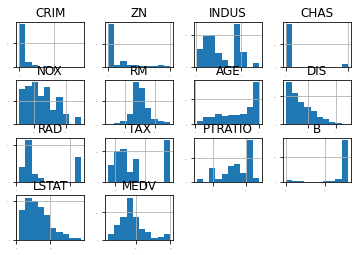

In [43]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

#### 2.3.1.2 Gráficos de Densidade

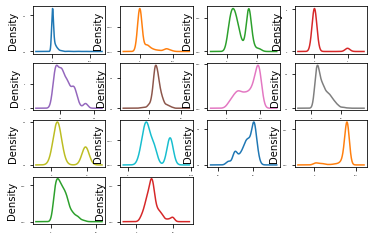

In [44]:
#gráficos de densidade
#atenção ao layout para caberem todos os gráficos (x * y >= n° de atributos)
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, legend=False, fontsize=2)
pyplot.show()

#### 2.3.1.3 Box Plot

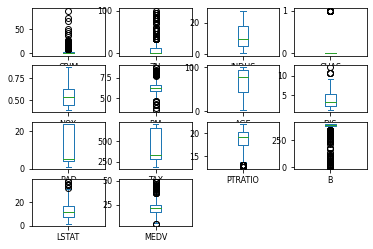

In [45]:
#box plot
#atenção ao layout para caberem todos os gráficos (x * y >= n° de atributos)
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

### 2.3.2 Gráficos Multivariados

#### 2.3.2.1 Matriz de Correlação

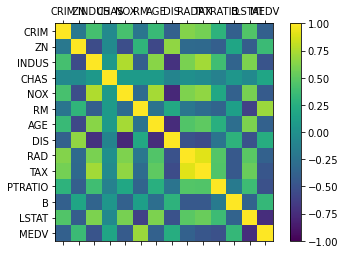

In [46]:
#matriz de correlação
#corr = 1 atributos diretamente correlacionados
#corr = 0 atributos não relacionados
#corr = -1 atributos inversamente correlacionados
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
pyplot.show()

#### 2.3.2.2 Scatter Plot

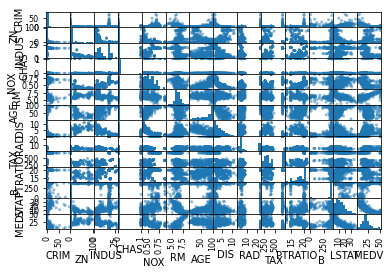

In [47]:
scatter_matrix(data)
pyplot.show()

## 2.4 Preparar Dados

O conjunto de dados não apresenta valores faltantes nem redundantes. Entretanto, os atributos estão em diversas escalas. Para corrigir isso iremos padronizar os dados.

### 2.4.1 Padronizar Dados

In [48]:
#dispõe os dados em forma de array
array = data.values

#fatia os dados em um conjunto de inputs X e outro de output y
X = array[ : , 0:13]
y = array[ : , 13]

#padroniza os dados (fit and transform)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#imprime os dados padronizados
set_printoptions(precision=3) #precisão de três casas decimais após a vírgula
print(X[ : , 0:13])

[[-0.42   0.285 -1.288 ... -1.459  0.441 -1.076]
 [-0.417 -0.488 -0.593 ... -0.303  0.441 -0.492]
 [-0.417 -0.488 -0.593 ... -0.303  0.396 -1.209]
 ...
 [-0.413 -0.488  0.116 ...  1.176  0.441 -0.983]
 [-0.408 -0.488  0.116 ...  1.176  0.403 -0.865]
 [-0.415 -0.488  0.116 ...  1.176  0.441 -0.669]]


---  
**Notas:**  
`X = array[ : , 0:13]` trata-se de um fatiamento (slice) no formato `[start, stop]`.  
Nesse caso, `start = : ` significa `start` da primeira à última linha e  
`stop = 0:13` significa `stop`da primeira à décima terceira coluna, ou melhor dizendo, da coluna de índice 0 à coluna de índice 13.  
Não podemos nos esquecer que no caso do Python os intervalos geralmente são [fechados, abertos[.  

https://docs.python.org/3/tutorial/introduction.html#lists  

`StandardScaler()`

### 2.4.2 Reduzir Dados

### 2.4.3 Fatiar Dados
Separa um conjunto de dados para o treinamento e um outro conjunto de dados para os testes.

In [49]:
#From documentation: split array or matrix into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

---
**Nota:**  
`train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#3. Algoritmos
---

## 3.1 Avaliar Algoritmos

### 3.1.1 Selecionar Algoritmos

In [50]:
#seleção de algoritmos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

---
**Nota:**  
Por que selecionamos esses algoritmos?

### 3.1.2 Comparar Algoritmos

In [51]:
#lista dos nomes dos algoritmos
names = []
#lista dos resultados dos algoritmos
results = []

print(f" {'Algoritmo'} | {'Média':<8} | {'Desvio'}")
print(32 * '-')

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

  #imprimir nome do algoritmo, média e desvio padrão
  msg = f" {name:<9} | {cv_results.mean():.4f} | {cv_results.std():.4f}"
  print(msg)
  print(32 * '-')

  #insere nome do algoritmo na lista names 
  names.append(name)
  #insere resultado do algoritmo na lista results
  results.append(cv_results)

 Algoritmo | Média    | Desvio
--------------------------------
 LR        | -22.0060 | 12.1889
--------------------------------
 LASSO     | -27.3209 | 12.0663
--------------------------------
 EN        | -28.4059 | 13.6343
--------------------------------
 KNN       | -21.2346 | 14.6781
--------------------------------
 CART      | -26.2980 | 17.0404
--------------------------------
 SVR       | -29.4321 | 18.0874
--------------------------------


### 3.1.3 Visualizar Comparação

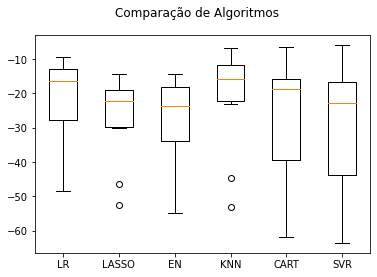

In [52]:
#comparação gráfica dos algoritmos
fig = pyplot.figure()
fig.suptitle('Comparação de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 3.2 Melhorar Desempenho do Melhor Algoritmo

### 3.2.1 Ajustar Parâmetros

In [53]:
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21,23,24,25,27,29])

#modelo que apresentou o melhor resultado
model = KNeighborsRegressor()

#ordena os parâmetros a serem testados
param_grid = dict(n_neighbors=k_values)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X_train, y_train)

### 3.2.2 Apresentar Resultados

In [54]:
#resultado dos testes com os diferentes parâmetros (n_neighbors / k_values)
print("Melhor resultado: %f usando %s \n" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) >>> %r" % (mean, stdev, param))

Melhor resultado: -17.798343 usando {'n_neighbors': 1} 

-17.798343 (11.855517) >>> {'n_neighbors': 1}
-19.724398 (13.013086) >>> {'n_neighbors': 3}
-21.234601 (14.678103) >>> {'n_neighbors': 5}
-21.908162 (14.878562) >>> {'n_neighbors': 7}
-20.901575 (14.874368) >>> {'n_neighbors': 9}
-20.964099 (14.709432) >>> {'n_neighbors': 11}
-21.171776 (14.510093) >>> {'n_neighbors': 13}
-21.848382 (14.162750) >>> {'n_neighbors': 15}
-22.639304 (14.510971) >>> {'n_neighbors': 17}
-23.346438 (14.678070) >>> {'n_neighbors': 19}
-24.004403 (14.923301) >>> {'n_neighbors': 21}
-24.785894 (15.207430) >>> {'n_neighbors': 23}
-25.184727 (15.324407) >>> {'n_neighbors': 24}
-25.421165 (15.457568) >>> {'n_neighbors': 25}
-26.105244 (15.897893) >>> {'n_neighbors': 27}
-27.018320 (16.414491) >>> {'n_neighbors': 29}


## 3.3 Melhorar Desempenho com Conjunto de Algoritmos

### 3.3.1 Selecionar Conjunto de Algoritmos (Ensembles)

In [55]:
#conjuntos (ensembles)
ensembles = []

#boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

#bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor(n_estimators=10))])))

---
**Nota:**  
Por que selecionamos esses conjuntos de algoritmos (ensembles)?

### 3.3.2 Comparar Conjuntos de Algoritmos

In [56]:
#lista dos nomes dos algoritmos
names = []
#lista dos resultados dos algoritmos
results = []

print(f" {'Algoritmo'} | {'Média':<8} | {'Desvio'}")
print(32 * '-')

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

  #imprimir nome do algoritmo, média e desvio padrão
  msg = f" {name:<9} | {cv_results.mean():.4f} | {cv_results.std():.4f}"
  print(msg)
  print(32 * '-')

  #insere nome do algoritmo na lista names
  names.append(name)
  #insere resultado do algoritmo na lista results
  results.append(cv_results)

 Algoritmo | Média    | Desvio
--------------------------------
 ScaledAB  | -15.0139 | 8.1998
--------------------------------
 ScaledGBM | -11.0101 | 8.5436
--------------------------------
 ScaledRF  | -12.6988 | 9.1544
--------------------------------
 ScaledET  | -10.5257 | 7.3389
--------------------------------


### 3.3.3 Visualizar Comparação

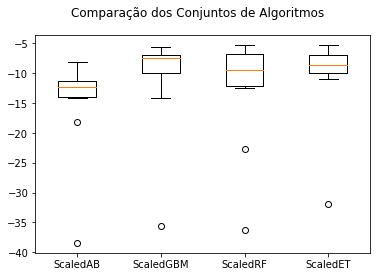

In [57]:
fig = pyplot.figure()
fig.suptitle('Comparação dos Conjuntos de Algoritmos')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 3.4 Melhorar Desempenho do Melhor Conjunto de Algoritmos

### 3.4.1 Ajustar Parâmetros


In [58]:
#refinar GBM

param_grid = dict(n_estimators=numpy.array([50,100,300,450,500,600,650,700]))

model = GradientBoostingRegressor(random_state=seed)

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X_train, y_train)

### 3.4.2 Apresentar Resultados

In [59]:
#resultado
print("Melhor resultado: %f usando %s \n" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) >>> %r" % (mean, stdev, param))

Melhor resultado: -10.531446 usando {'n_estimators': 650} 

-11.629999 (8.833221) >>> {'n_estimators': 50}
-11.071817 (8.771959) >>> {'n_estimators': 100}
-10.641054 (8.494574) >>> {'n_estimators': 300}
-10.538554 (8.333762) >>> {'n_estimators': 450}
-10.543579 (8.311854) >>> {'n_estimators': 500}
-10.532535 (8.300689) >>> {'n_estimators': 600}
-10.531446 (8.292817) >>> {'n_estimators': 650}
-10.535916 (8.275346) >>> {'n_estimators': 700}


##4. Finalizar Modelo

## 4.1 Gravar Modelo

In [60]:
model = GradientBoostingRegressor(random_state=seed, n_estimators=650)
model.fit(X_train, y_train)

#gravar o modelo no disco
filename = 'boston_model.sav'
joblib.dump(model, filename)

['boston_model.sav']

## 4.2 Carregar Modelo

In [63]:
#carregar modelo do disco 
loaded_model = joblib.load(filename)

## 4.3 Usar Modelo

In [71]:
result = loaded_model.score(X_test, y_test)
print(f'Score: {result}')

prediction = loaded_model.predict(X_test)
mean2error = mean_squared_error(y_test, prediction)
print(f'Erro: {mean2error}')

Score: 0.8506867007327692
Erro: 12.065449295823134
